### Imports

In [1]:
import numpy as np
import pandas as pd
import ace_tools_open as tools
from case_studies import *
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
#Save case study functions, their derivatives and hessians in lists
fs = [f1, f3, f4, f5]
dfs = [df1, df3, df4, df5]
Hfs = [Hf1, Hf3, Hf4, Hf5]
fnames = ["f1", "f3", "f4", "f5"]

fsAN = [f1, f4]
dfsAN = [df1, df4]
HfsAN = [Hf1, Hf4]
fnamesAN = ["f1", "f4"]

In [3]:
def backtracking_line_search(f, df, x, pk, alpha_init, c1, rho):
    
    alpha = alpha_init
    while f(x + alpha * pk) > f(x) + c1 * alpha * np.dot(df(x), pk):
        alpha *= rho
    return alpha

### Newtons Method

In [ ]:
def newtons_method__linear_eq_constraint(f, df, Hf, x0, c1=1e-4, rho=0.9, tol=1e-8, max_iters=1000):
    #Implement
    
    return

### Steepest Descent

In [ ]:
def steepest_descent_linear_eq_constraint(f, df, x0, c1=1e-4, rho=0.9, tol=1e-8, max_iters=1000):
    #Implement
    return


In [ ]:
def benchmark(f, df, optimizer, x0, x_opt, Hf=None):
    start_time = time.time()
    if optimizer == newtons_method__linear_eq_constraint:
        x_final, xs = optimizer(f, df, Hf, x0)
    if optimizer == steepest_descent_linear_eq_constraint:
        x_final, xs = optimizer(f, df, x0)
    end_time = time.time()

    num_iterations = len(xs)
    final_solution_point = x_final
    dist_to_optimum = np.linalg.norm(x_final-x_opt)
    final_fun_value = f(xs[-1])
    duration = end_time-start_time
    
    grad_norms = [np.linalg.norm(df(x)) for x in xs]

    return (num_iterations, duration, final_fun_value, final_solution_point, dist_to_optimum, grad_norms, grad_norms[-1])


In [ ]:
SEED = 10
np.random.seed(SEED)
d = 20
num_runs = 500
benchmark_results = []

for f, df, Hf, fname in zip(fs, dfs, Hfs, fnames):
    x_optimal = x_opt(f, d)

    #Original Newtons Method
    for _ in range(num_runs):
        x0 = np.random.randn(d)  
        sd_result = benchmark(f, df, newtons_method__linear_eq_constraint, x0, x_optimal, Hf)
        benchmark_results.append((fname, "Newtons Method") + sd_result)

        # steepest descent
        sd_result = benchmark(f, df, steepest_descent_linear_eq_constraint, x0, x_optimal)
        benchmark_results.append((fname, "scipy BFGS") + sd_result)
        
#Organize in dataframe
columns = ["Function", "Optimizer", "Iterations", "Time", "Final Function Value", "Final Solution Point", "Distance to Optimum", "Gradient Norms", "Final Gradient Norm"]
df_results = pd.DataFrame(benchmark_results, columns=columns)

df_display = df_results.drop(columns=["Final Solution Point", "Gradient Norms"])
tools.display_dataframe_to_user(name="Benchmark Results", dataframe=df_display)

Benchmark Results


In [8]:
df_avg_results = df_results.groupby(["Function", "Optimizer"]).agg({
    "Iterations": "mean",
    "Time": "mean",
    "Final Function Value": "mean",
    "Distance to Optimum": "mean",
    "Final Gradient Norm": "mean"
}).reset_index()

# Display the final averaged results
tools.display_dataframe_to_user(name="Averaged Optimization Results", dataframe=df_avg_results)

Averaged Optimization Results


In [9]:
df_avg_results_no_scipy = df_avg_results[df_avg_results["Optimizer"] != "scipy BFGS"]
tools.display_dataframe_to_user(name="Averaged Optimization Results", dataframe=df_avg_results)

Averaged Optimization Results


In [10]:
def extract_grad_norms(df, function_name, optimizer_name):
    return df[(df["Function"] == function_name) &  (df["Optimizer"] == optimizer_name)]["Gradient Norms"].tolist()


def pad_grad_norms(grad_norms_list):
    max_length_run = max(len(run) for run in grad_norms_list)
    #print(max_length_run)
    padded_runs = []

    for run in grad_norms_list:
        padded_run = np.pad(run, (0, max_length_run - len(run)), mode="constant", constant_values=0)
        padded_runs.append(padded_run)
    
    return padded_runs

def get_avg_grad_norms(df, function_name, optimizer_name):

    grad_norms = extract_grad_norms(df, function_name, optimizer_name)
    padded_grad_norms = pad_grad_norms(grad_norms)
    mean_grad_norms = np.mean(padded_grad_norms, axis=0)

    return mean_grad_norms

In [ ]:
f1_newton_avg = get_avg_grad_norms(df_results, "f1", "Newtons Method")
f3_newton_avg = get_avg_grad_norms(df_results, "f4", "Newtons Method")
f4_newton_avg = get_avg_grad_norms(df_results, "f4", "Newtons Method")
f5_newton_avg = get_avg_grad_norms(df_results, "f4", "Newtons Method")

f1_sd_avg = get_avg_grad_norms(df_results, "f1", "Steepest Descent")
f3_sd_avg = get_avg_grad_norms(df_results, "f3", "Steepest Descent")
f4_sd_avg = get_avg_grad_norms(df_results, "f4", "Steepest Descent")
f5_sd_avg = get_avg_grad_norms(df_results, "f5", "Steepest Descent")



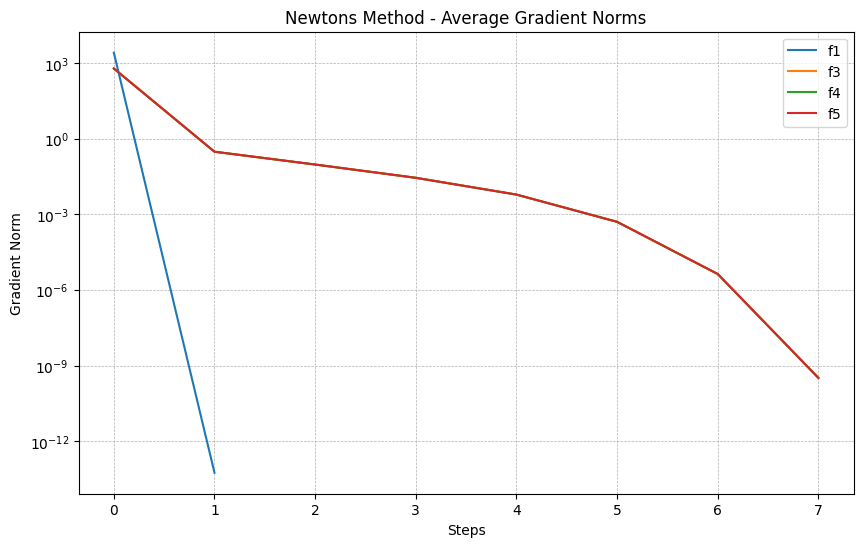

NameError: name 'f1_bfgs_avg' is not defined

In [ ]:
def plot_convergence(title, f1_avg, f3_avg, f4_avg, f5_avg):
    plt.figure(figsize=(10, 6))

    plt.plot(range(len(f1_avg)), f1_avg, label="f1")
    plt.plot(range(len(f3_avg)), f3_avg, label="f3")
    plt.plot(range(len(f4_avg)), f4_avg, label="f4")
    plt.plot(range(len(f5_avg)), f5_avg, label="f5")

    plt.xlabel("Steps")
    plt.ylabel("Gradient Norm")
    plt.title(title)
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

def plot_convergence_AN(title, f1_avg, f4_avg):
    plt.figure(figsize=(10, 6))

    plt.plot(range(len(f1_avg)), f1_avg, label="f1")
    plt.plot(range(len(f4_avg)), f4_avg, label="f4")

    plt.xlabel("Steps")
    plt.ylabel("Gradient Norm")
    plt.title(title)
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

plot_convergence("Newtons Method - Average Gradient Norms", f1_newton_avg, f3_newton_avg, f4_newton_avg, f5_newton_avg)
plot_convergence("Steepest Descent - Average Gradient Norms", f1_sd_avg, f3_sd_avg, f4_sd_avg, f5_sd_avg)
